In [203]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [168]:
path = os.path.abspath(os.path.join(os.getcwd(), '../') + '\\data\\Mall_Customers.csv')
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [169]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [170]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [171]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='percent', ylabel='Gender'>

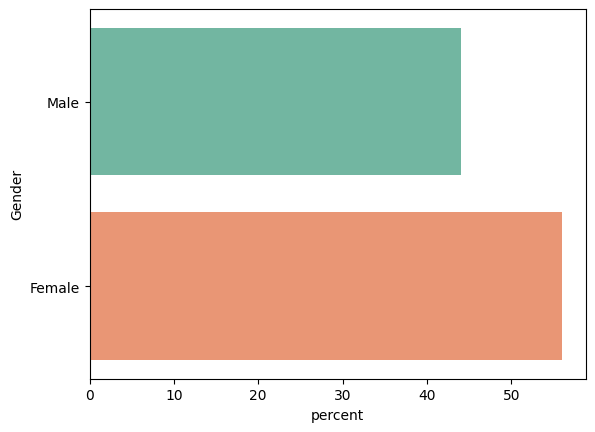

In [172]:
sns.countplot(data=df, y='Gender', palette='Set2', stat='percent')

In [173]:
numeric_cols = df.loc[:,df.columns.isin(['Age', "Annual Income (k$)", 'Spending Score (1-100)'])].columns
numeric_cols

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

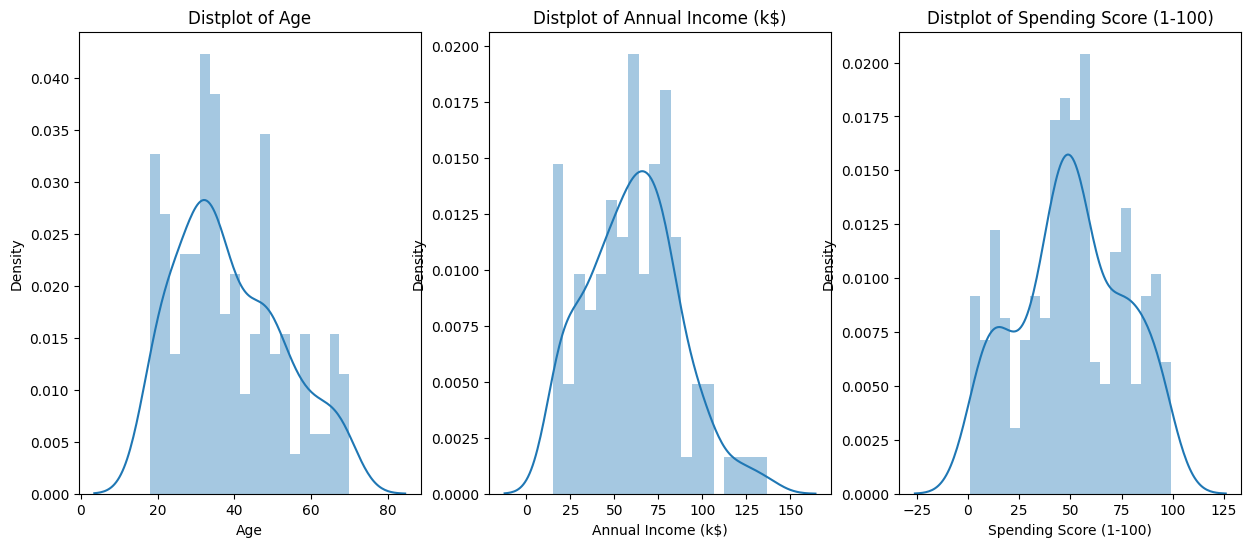

In [174]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in df[numeric_cols]:
    n += 1
    plt.subplot(1 , 3 , n)
    #plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


In [175]:
df[numeric_cols].skew()
#all 3 features are approximately symmetric

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [176]:
df[numeric_cols].kurt()

Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

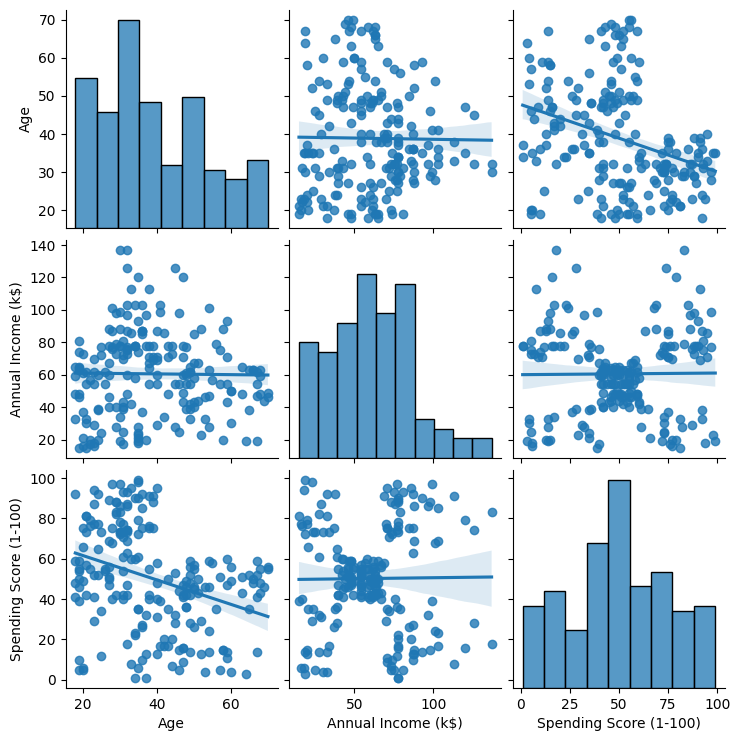

In [177]:
sns.pairplot(df[numeric_cols], kind='reg')

<Axes: >

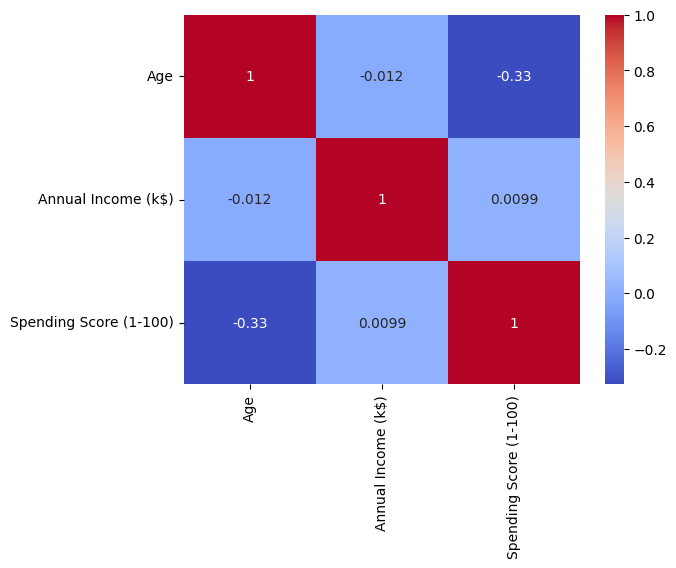

In [178]:
#correlation check
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: >

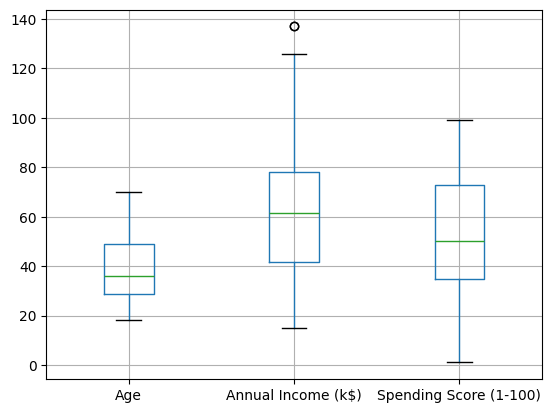

In [179]:
#check for outliers
df[numeric_cols].boxplot()

In [180]:
#outlier values
df[df["Annual Income (k$)"] > 130]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [181]:
## Feature engineering

<Axes: xlabel='Age', ylabel='Gender'>

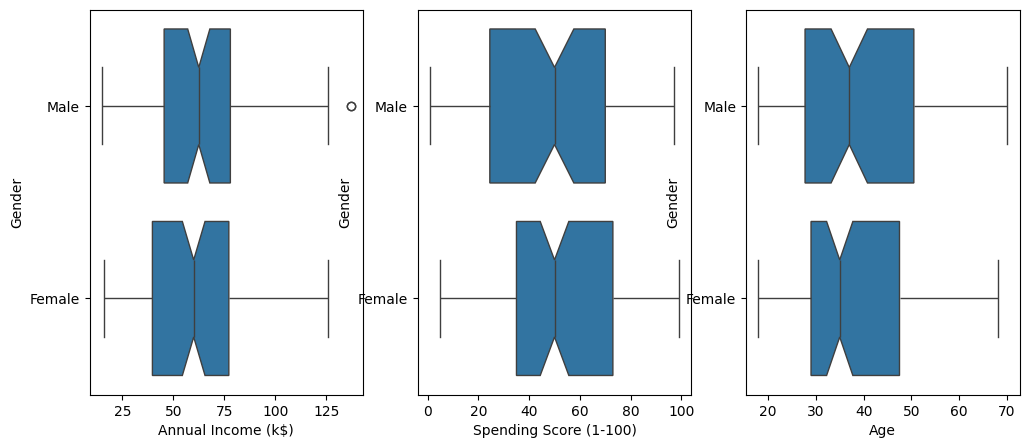

In [182]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(12, 5))
sns.boxplot(y="Gender", x="Annual Income (k$)", data=df, ax=ax1, notch=True)
sns.boxplot(y="Gender", x="Spending Score (1-100)", data=df, ax=ax2, notch=True)
sns.boxplot(y="Gender", x="Age", data=df, ax=ax3, notch=True)


In [183]:
#Independent sample t-test
def t_test_ind(column):
    male_x = df[(df['Gender'] == 'Male')][column]
    female_x = df[(df['Gender'] == 'Female')][column]
    result = ttest_ind(male_x, female_x)
    print(f'Column: {column} p-value: {np.round(result.pvalue,2)}')

for column in numeric_cols:
    t_test_ind(column)

Column: Age p-value: 0.39
Column: Annual Income (k$) p-value: 0.43
Column: Spending Score (1-100) p-value: 0.41


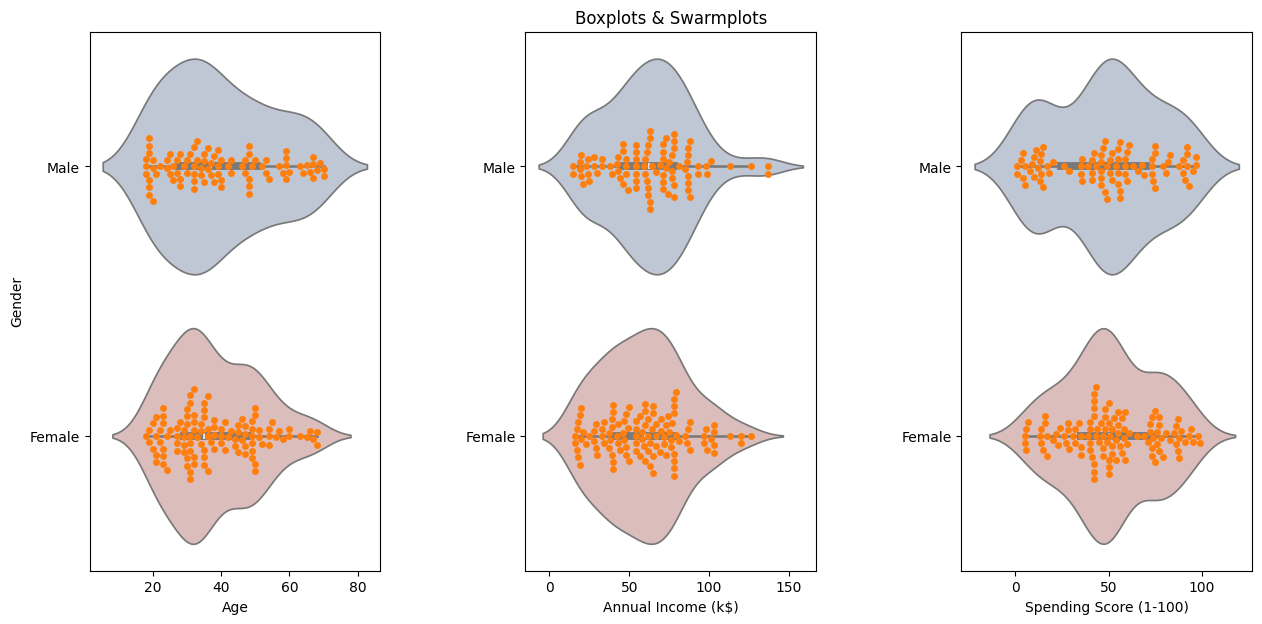

In [184]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in df[numeric_cols].columns:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [185]:
df[(df['Gender'] == 'Female') & (df['Age'] <= 20)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
39,40,Female,20,37,75
111,112,Female,19,63,54
114,115,Female,18,65,48
115,116,Female,19,65,50


In [186]:
df["age-bins"] = pd.cut(df.Age, bins=[0,20,40,60,80], labels=["young", "adult", "middle-aged", "older"], include_lowest=True)
df.groupby(["Gender", "age-bins"], sort=False)['Age'].agg(["count"])

count
Gender age-bins          
Male   young           12
       adult           41
       older           11
       middle-aged     24
Female young            5
       adult           64
       older            6
       middle-aged     37

In [187]:
#Mean and variances are almost similar in both genders
df.groupby('Gender')[numeric_cols].agg(['mean', 'std'])

Age            Annual Income (k$)             \
             mean        std               mean        std   
Gender                                                       
Female  38.098214  12.644095          59.250000  26.011952   
Male    39.806818  15.514812          62.227273  26.638373   

       Spending Score (1-100)            
                         mean       std  
Gender                                   
Female              51.526786  24.11495  
Male                48.511364  27.89677

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

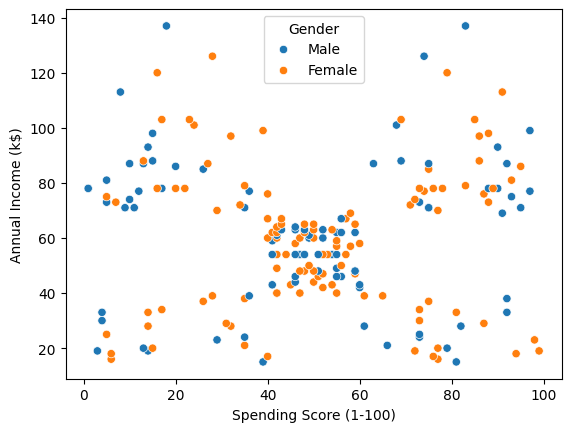

In [188]:
sns.scatterplot(x = 'Spending Score (1-100)' , y = 'Annual Income (k$)' , hue='Gender', data =df)
#Gender does not appear to be a strong differentiator in the relationship between income and spending score.

In [189]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])
#X_scaled   

In [190]:
X_scaled_df = pd.DataFrame(X_scaled, columns=df[numeric_cols].columns, index=df[numeric_cols].index)
X_scaled_df

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [191]:
label_encoder = LabelEncoder()
df["Gender_enc"] = label_encoder.fit_transform(df["Gender"])
X_scaled_df.join(df["Gender_enc"])

,Age,Annual Income (k$),Spending Score (1-100),Gender_enc
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [192]:
def plot3d(X, labels, centroids):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    # Create the 3D scatter plot
    ax.scatter(xs='Age', ys='Annual Income (k$)', zs='Spending Score (1-100)', c=labels, marker='o', data=X, s=70)
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X', alpha=0.6, label='Centroids')
    
    # Label each centroid
    for i, (x, y, z) in enumerate(centroids):
        ax.text(x, y, z, f'Centroid {i}', color='black', fontsize=10, weight='bold')


    # Set labels for the axes
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income (k$)')
    ax.set_zlabel('Spending Score (1-100)')

    # Set a title for the plot
    plt.title('Clustering - Age vs Annual Income vs Spending Score')

    # Display the plot
    plt.show()


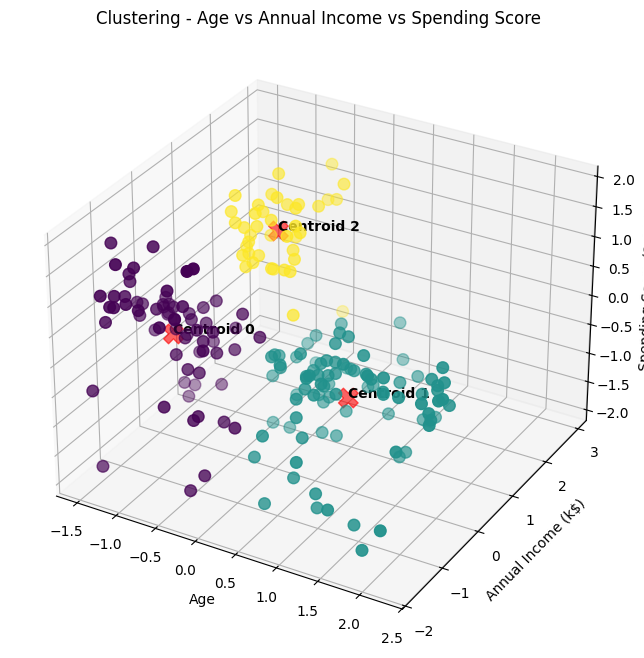

In [193]:
kmeans = KMeans(n_clusters =3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
kmeans.fit(X_scaled_df)
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_
plot3d(X_scaled_df, labels3, kmeans.cluster_centers_)

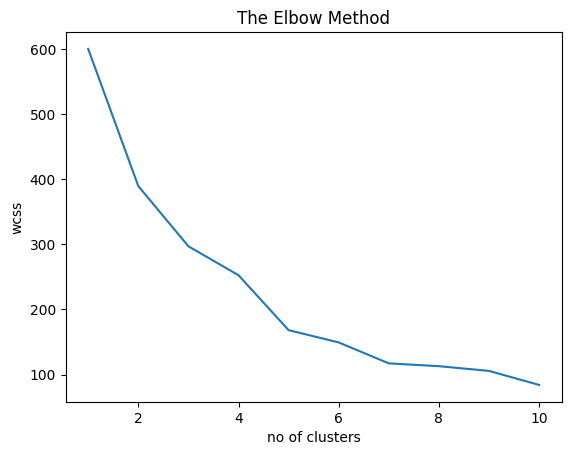

In [194]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [195]:
#Kmeans with 5 clusters
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
kmeansmodel.fit(X_scaled_df)
labels5=  kmeansmodel.labels_ # or kmeansmodel.fit_predict(X_scaled_df)

In [196]:
# evaluate clusters

In [197]:
sil_score = silhouette_score(X_scaled_df, labels5)
sil_score
#moderate separation of clusters - score can be improved if possible
#try removing age and check if score improves

0.41664341513732767

In [198]:
#checking silhouette score for other cluster sizes
for i in range(2,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    labels = kmeans.fit_predict(X_scaled_df)
    score = silhouette_score(X_scaled_df, labels)
    print(f'k={i}, score={score}')

k=2, score=0.33547192894004574
k=3, score=0.35027143562558555
k=4, score=0.34983789408081173
k=5, score=0.41664341513732767
k=6, score=0.3926245613672707
k=7, score=0.42190482256145484
k=8, score=0.4093257483167767
k=9, score=0.37662187748041265
k=10, score=0.4162457571911426


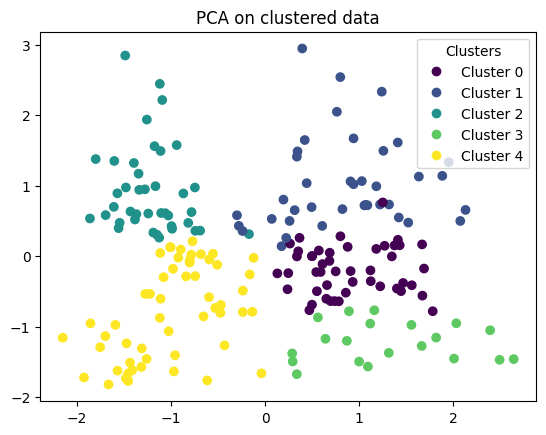

In [199]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled_df)
scatter = plt.scatter(components[:,0], components[:,1], c=labels5, label=labels5)
handles, _ = scatter.legend_elements(prop="colors")
labels = [f"Cluster {i}" for i in range(len(handles))]
plt.legend(handles, labels, title="Clusters")
plt.title("PCA on clustered data")
plt.show()

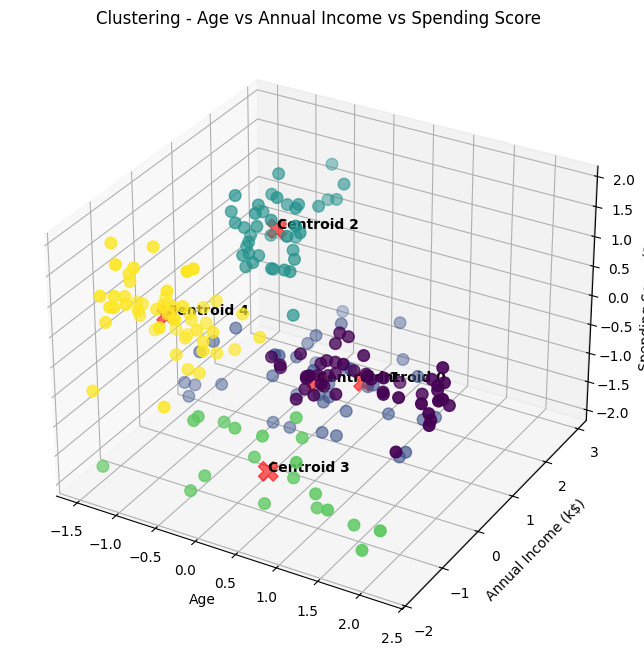

In [200]:
plot3d(X_scaled_df, labels5, kmeansmodel.cluster_centers_)

In [201]:
#interpret cluster

In [202]:
#Compare means and std in clusters
df["Clusters"] = kmeansmodel.labels_
df.groupby("Clusters")[numeric_cols].agg(['mean'])

,Age,Annual Income (k$),Spending Score (1-100)
,mean,mean,mean
Clusters,,,
0,55.638298,54.382979,48.851064
1,39.871795,86.102564,19.358974
2,32.875000,86.100000,81.525000
3,46.250000,26.750000,18.350000
4,25.185185,41.092593,62.240741


In [321]:
df.groupby("Clusters")[numeric_cols].describe()

Age                                                        \
         count       mean        std   min    25%   50%    75%   max   
Clusters                                                               
0         47.0  55.638298   8.913657  40.0  49.00  54.0  65.00  70.0   
1         39.0  39.871795  10.938054  19.0  34.00  41.0  47.00  59.0   
2         40.0  32.875000   3.857643  27.0  30.00  32.0  36.00  40.0   
3         20.0  46.250000  11.579815  20.0  36.75  47.0  53.25  67.0   
4         54.0  25.185185   5.508395  18.0  21.00  24.0  30.00  38.0   

         Annual Income (k$)             ...                \
                      count       mean  ...    75%    max   
Clusters                                ...                 
0                      47.0  54.382979  ...  62.00   79.0   
1                      39.0  86.102564  ...  95.00  137.0   
2                      40.0  86.100000  ...  94.00  137.0   
3                      20.0  26.750000  ...  33.00   39.0   
4                      54.0  41.092593  ...  57.75   67.0   

         Spending Score (1-100)                                                \
                          count       mean        std   min   25%   50%   75%   
Clusters                                                                        
0                          47.0  48.851064   6.303825  35.0  44.5  48.0  54.0   
1                          39.0  19.358974  11.610991   1.0  10.5  17.0  27.5   
2                          40.0  81.525000   9.999968  58.0  74.0  83.0  90.0   
3                          20.0  18.350000  11.935242   3.0   6.0  14.5  29.5   
4                          54.0  62.240741  16.596130  39.0  50.0  58.0  74.5   

                
           max  
Clusters        
0         60.0  
1         42.0  
2         97.0  
3         36.0  
4         99.0  

[5 rows x 24 columns]

In [250]:
#Checking high variability using Coefficient of Variation
desc_df = df.groupby("Clusters")[numeric_cols].describe()
means = desc_df.loc[:, (slice(None), 'mean')]
stds = desc_df.loc[:, (slice(None), 'std')]
means.columns = means.columns.droplevel(1)
stds.columns = stds.columns.droplevel(1)
cv_df = np.round(stds/means * 100, 2)
cv_df.columns = [f'CV_{col} %' for col in cv_df.columns]
cv_df

,CV_Age %,CV_Annual Income (k$) %,CV_Spending Score (1-100) %
Clusters,,,
0,16.02,16.22,12.90
1,27.43,19.42,59.98
2,11.73,18.98,12.27
3,25.04,27.33,65.04
4,21.87,40.92,26.66


In [208]:
#silhouette coefficient per cluster
silhouette_values = silhouette_samples(X_scaled_df, labels5)
df_silhouette = pd.DataFrame({
    "Cluster" : labels5,
    "Silhouette" : silhouette_values
})

cluster_sil = df_silhouette.groupby('Cluster')['Silhouette'].mean().reset_index()
cluster_sil.columns = ["Cluster", "Mean silhouette"]
cluster_sil

,Cluster,Mean silhouette
0,0,0.483787
1,1,0.304751
2,2,0.536228
3,3,0.332056
4,4,0.381762


In [287]:
#subset clustering on high CV cluster
cluster3_df = df[df["Clusters"] == 3]
kmeans_3 = KMeans(n_clusters=2, random_state=22)
cluster3_df["Sub-cluster"] = kmeans_3.fit_predict(cluster3_df[numeric_cols])
df6 = df.copy(deep=True)
df6.loc[cluster3_df.index, "Clusters"] = ("3_" + cluster3_df["Sub-cluster"].astype(str))
df6.Clusters.value_counts()

Clusters
4      54
0      47
2      40
1      39
3_1    10
3_0    10
Name: count, dtype: int64

In [313]:
#local silhouette score
split_data = df6[df6["Clusters"].str.startswith("3_",  na=False)]
split_labels = split_data["Clusters"]
encoded_labels = LabelEncoder().fit_transform(split_labels)
print("Local silhouette score:", silhouette_score(split_data[numeric_cols], encoded_labels))

#global silhouette score
encoded_labels_global = LabelEncoder().fit_transform(df6["Clusters"].astype(str))
print("Global silhouette score:",silhouette_score(X_scaled_df, encoded_labels_global))

#both the scores did not improve. So reverting the split cluster.

Local silhouette score: 0.3368588455130107
Global silhouette score: 0.3835019124681226


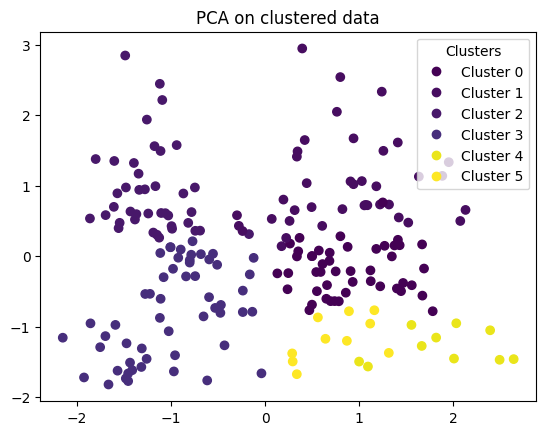

In [315]:
scatter = plt.scatter(components[:,0], components[:,1], c=df6["Clusters"], label=df6["Clusters"])
handles, _ = scatter.legend_elements(prop="colors")
labels = [f"Cluster {i}" for i in range(len(handles))]
plt.legend(handles, labels, title="Clusters")
plt.title("PCA on clustered data")
plt.show()

<Axes: xlabel='Clusters'>

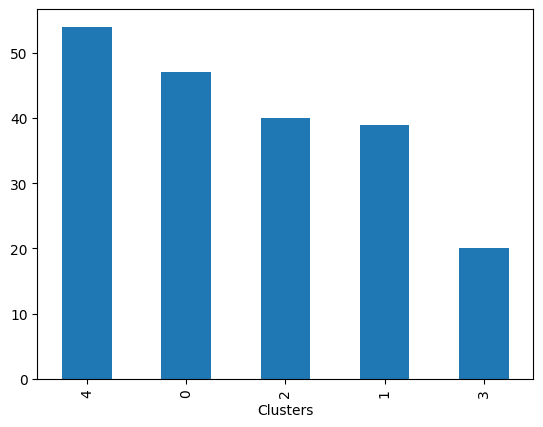

In [320]:
#Analyze cluster size
df["Clusters"].value_counts().plot(kind='bar')

In [330]:
cross_df = pd.crosstab(df["Clusters"], df["Gender"], normalize='index') * 100
cross_df
#or
#df.groupby(["Clusters", "Gender"]).size().unstack()
#or
#df.pivot_table(index="Clusters", values="Age", columns="Gender", aggfunc='count')


# no gender based domination 

Gender,Female,Male
Clusters,,
0,57.446809,42.553191
1,48.717949,51.282051
2,55.000000,45.000000
3,60.000000,40.000000
4,59.259259,40.740741


<Axes: xlabel='Clusters', ylabel='count'>

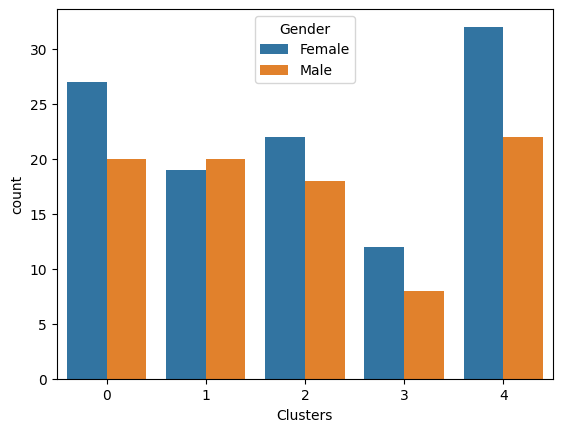

In [179]:
sns.countplot(data=df, x='Clusters', hue='Gender')

<Axes: xlabel='Clusters', ylabel='Age'>

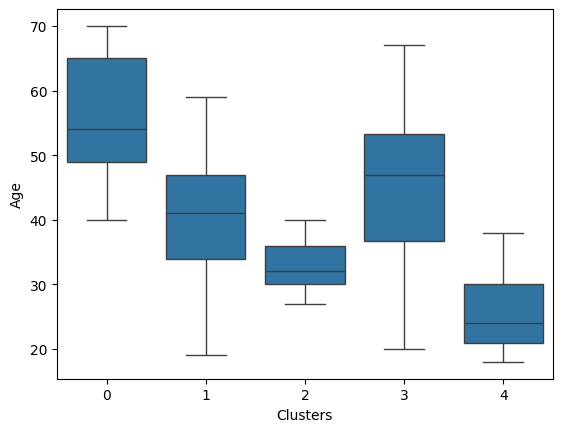

In [189]:
sns.boxplot(data=df, x="Clusters", y ='Age')